type in 7 long sequence of H or P's HPPHPPP


There are  3.0  internal HP interactions and  2 outwards facing Hydrophobic elements so there is an energy penalty of 9  e
There are  3.0  internal HP interactions and  2 outwards facing Hydrophobic elements so there is an energy penalty of 9  e
There are  4.0  internal HP interactions and  1 outwards facing Hydrophobic elements so there is an energy penalty of 7  e
There are  4.0  internal HP interactions and  1 outwards facing Hydrophobic elements so there is an energy penalty of 7  e
There are  1.0  internal HP interactions and  2 outwards facing Hydrophobic elements so there is an energy penalty of 7  e
There are  3.0  internal HP interactions and  2 outwards facing Hydrophobic elements so there is an energy penalty of 9  e
Conformations  [3, 4, 5]  have the lowest energy and are therefore the most likely to be proteins


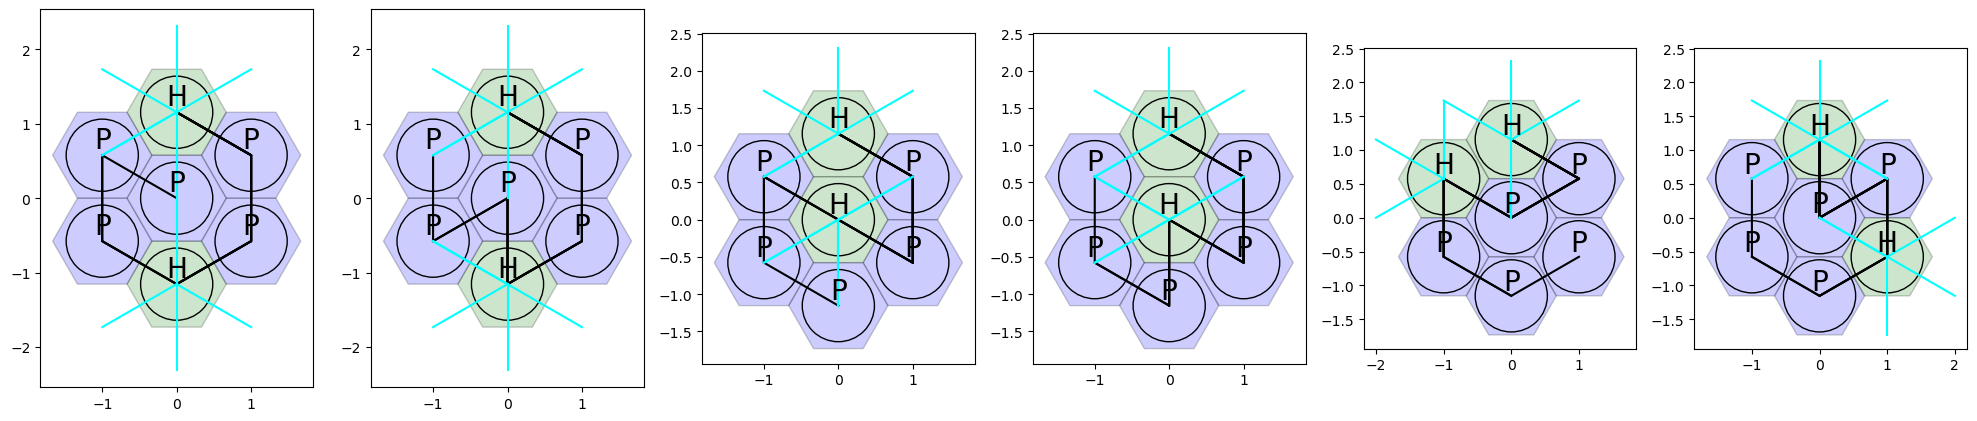

In [406]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.pyplot import figure
import numpy as np
#input your HP pattern here

coord = [[0,0,0],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0],[1,0,-1]]
#hard coded compact structures, might have missed a few but my point stands
order=[[1, 6, 5, 4, 3, 2, 0], [1, 6, 5, 4, 0, 3, 2], [1, 6, 5, 0, 2, 3, 4], [1, 6, 5, 0, 4, 3, 2], [1, 6, 0, 2, 3, 4, 5], [1, 0, 6, 5, 4, 3, 2]]
proteincandidates=[]  
interactions=[]
energypenalty=[]

pattern=input("type in 7 long sequence of H or P's")
if len(pattern)>7:
    pattern=pattern[0:7]
    pattern=pattern.upper()

#finds coordinates from hexagon number
def getcoor(index,dim):
    xcoord = coord[index][0]
    ycoord = 2. * np.sin(np.radians(60)) * (coord[index][1] - coord[index][2]) /3. 
    if dim=="x":
        return(xcoord)
    if dim=="y":
        return(ycoord)
    else:
        return([xcoord,ycoord])
#returns colour of hex depending on H or P
def getcolour(index):
    if list(pattern)[index]=="H":
        return("green")
    elif list(pattern)[index]=="P":
        return("blue")
    else:
        return("white")
# returns hexes adjascent to index number
def gettouch(index):
    if index==1:
        return([0,2,6])
    elif index==6:
        return([5,0,1])
    elif index==0:
        return([1,2,3,4,5,6])
    else:
        return([index+1,index-1,0])
    



fig, ax = plt.subplots(1,len(order),figsize=(20,8))
fig.tight_layout()
#interate through each compact structure
for arran in range(len(order)):
    ax[arran].set_aspect('equal')
    patternindex={}
    bad=[]
    outsidelines=[]
    outside=[]
    #first link always starts at the top of the hexagon at position 1
    backbone=[[0],[1.1547005383792515]]
    #relates HP sequence to hexagon indicies
    for unit in range(len(order[arran])):
        patternindex[order[arran][unit]]=list(pattern)[unit]
    #iterates through each structure sequence using indicies
    for unit in range(len(order[arran])):
        touch=gettouch(order[arran][unit])
        bonds=[]
        interactions=[]
        
        colour=getcolour(unit)
        
        
        hex = RegularPolygon((getcoor(order[arran][unit],"x"),getcoor(order[arran][unit],"y")), numVertices=6, radius=2. / 3., 
                     orientation=np.radians(30), 
                     facecolor=colour, alpha=0.2, edgecolor='k')
        
        ax[arran].add_patch(hex)
        ax[arran].scatter(getcoor(order[arran][unit],"x"), getcoor(order[arran][unit],"y"),  facecolors='none', edgecolors='black',s=2700)   
        #labels each hexagon as H or P
        ax[arran].text(getcoor(order[arran][unit],"x"), getcoor(order[arran][unit],"y")+0.2, list(pattern)[unit], ha='center', va='center', size=20)
        #ax[arran].text(getcoor(order[arran][unit],"x"), getcoor(order[arran][unit],"y")-0.2, unit, ha='center', va='center', size=20)
        
        #finds and records the sequence based on graph coordinates for visualization
        if unit==0:
            pass
        else:
            backbone[0].append(getcoor(order[arran][unit],"x"))
            backbone[1].append(getcoor(order[arran][unit],"y"))
        ax[arran].plot(backbone[0],backbone[1],color="black")


        #iterates through each adjacent hexagon 
        for i in range(len(touch)):
            #throws out adjacent hexagons that are bound by the HP sequence
            if unit==0:
                if touch[i]==order[arran][unit+1]:
                    bonds.append(touch[i])

            elif unit==len(order[arran])-1:
                if touch[i]==order[arran][unit-1]:
                    bonds.append(touch[i])
                    
            else:
                if touch[i]==order[arran][unit+1] or touch[i]==order[arran][unit-1]:
                    bonds.append(touch[i])

        for i in range(len(touch)):
            if touch[i] not in bonds:
                interactions.append(touch[i])
        #iterates through each non bonding interaction to determine if it is an HP interaction (energy penalty)
        for i in interactions:
            if patternindex[i]!=patternindex[order[arran][unit]]:
                bad.append([[getcoor(order[arran][unit],"x"),getcoor(i,"x")],[getcoor(order[arran][unit],"y"),getcoor(i,"y")]])
        if order[arran][unit] != 0 and patternindex[order[arran][unit]]=="H":
            outside.append(order[arran][unit])
            
    #records HP interactiosn with surrounding water molecules        
    for i in range(len(outside)):
        if getcoor(outside[i],"x")>0:
            outsidelines.append([[getcoor(outside[i],"x")+1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")+0.5773502691896257,getcoor(outside[i],"y")]])
            outsidelines.append([[getcoor(outside[i],"x")+1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")-0.5773502691896257,getcoor(outside[i],"y")]])
        if getcoor(outside[i],"x")<0:
            outsidelines.append([[getcoor(outside[i],"x")-1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")+0.5773502691896257,getcoor(outside[i],"y")]])
            outsidelines.append([[getcoor(outside[i],"x")-1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")-0.5773502691896257,getcoor(outside[i],"y")]])
        if getcoor(outside[i],"y")>0:
            if getcoor(outside[i],"x")==0:
                outsidelines.append([[getcoor(outside[i],"x")+1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")+0.5773502691896257,getcoor(outside[i],"y")]])
                outsidelines.append([[getcoor(outside[i],"x")-1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")+0.5773502691896257,getcoor(outside[i],"y")]])
            outsidelines.append([[getcoor(outside[i],"x"),getcoor(outside[i],"x")],[getcoor(outside[i],"y")+1.1547005383792515,getcoor(outside[i],"y")]])
        if getcoor(outside[i],"y")<0:
            if getcoor(outside[i],"x")==0:
                outsidelines.append([[getcoor(outside[i],"x")+1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")-0.5773502691896257,getcoor(outside[i],"y")]])
                outsidelines.append([[getcoor(outside[i],"x")-1,getcoor(outside[i],"x")],[getcoor(outside[i],"y")-0.5773502691896257,getcoor(outside[i],"y")]])
            outsidelines.append([[getcoor(outside[i],"x"),getcoor(outside[i],"x")],[getcoor(outside[i],"y")-1.1547005383792515,getcoor(outside[i],"y")]])

     #visualizes HP interactions    
    for i in range(len(bad)):
        ax[arran].plot(bad[i][0],bad[i][1],color="cyan")
        
    #visualizes HP interactions with surrounding water molecules 
    for i in range(len(outsidelines)):
        ax[arran].plot(outsidelines[i][0],outsidelines[i][1],color="cyan")
    
    #counts tabulates energy penalty
    energypenalty.append(len(bad)/2+3*len(outside))
    print("There are ",len(bad)/2," internal HP interactions and ",len(outside),"outwards facing Hydrophobic elements so there is an energy penalty of",int(len(bad)/2)+3*len(outside)," e")

#finds protein conformation
for i in range(len(energypenalty)):
    if energypenalty[i]==min(energypenalty):
        proteincandidates.append(i+1)

print("Conformations ", proteincandidates, " have the lowest energy and are therefore the most likely to be proteins")
plt.show()


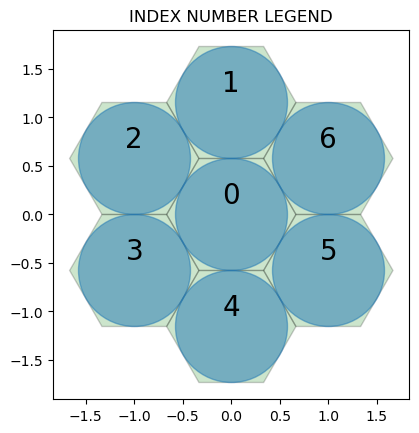

In [409]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

coord = [[0,0,0],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0],[1,0,-1]]
labels = [0,1,2,3,4,5,6]

# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartersian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# Add some coloured hexagons
for x, y, c, l in zip(hcoord, vcoord, colors, labels):
    #color = c[0].lower()  # matplotlib understands lower case words for colours
    hex = RegularPolygon((x, y), numVertices=6, radius=2. / 3., 
                         orientation=np.radians(30), 
                         facecolor=color, alpha=0.2, edgecolor='k')
    ax.add_patch(hex)
    # Also add a text label
    ax.text(x, y+0.2, l, ha='center', va='center', size=20)

# Also add scatter points in hexagon centres
ax.scatter(hcoord, vcoord, s=6500,alpha=.5)
plt.title("INDEX NUMBER LEGEND")
plt.show()